## Data Wrangling

In this notebook we

1. Load data generated from [Graph Generation](https://github.com/nicolechao/graph-complexity-analysis/blob/master/Graph%20Generation/graph_generation.ipynb).
2. TBD.

### Load Packages

In [1]:
import sys
import networkx as nx
import networkx.generators as nx_gen_graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Prepare Functions for Plotting

In [2]:
def get_sub_plot(width = 10, height = 6, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    fig.set_size_inches(20, 20 / n_cols * n_rows)
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [3]:
def draw_graph(graph):
    ax = get_sub_plot()
    nx.draw_networkx(graph, ax = ax)
    
def draw_graphs(graphs, titles, n_cols = 2):
    n_total_cols = len(graphs)
    
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    for graph, title, ax in zip(graphs, titles, axes):
        nx.draw_networkx(graph, ax = ax)
        ax.set_title(title, size = 20)
                                
    fig.tight_layout()    
    plt.show()

### Prepare Function for Collecting Graph Metrics

In [4]:
def collect_graph_basic_metrics(graph):
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    degree = nx.degree(G)
    density = nx.density(G)
    n_self_loops = nx.number_of_selfloops(G)
    nodes = G.nodes()
    edges = G.edges()
    
    return (n_nodes, n_edges, degree, density, n_self_loops, nodes, edges)

### Loda Data

In [5]:
data_dir = '../Data/*.pkl'
! ls {data_dir}

../Data/graphs.pkl


In [6]:
# Load data for the traning set
df = pd.read_pickle('../Data/graphs.pkl')

In [7]:
df

,Graph Type,Number of Nodes,Number of Edges,Degree,Density,Number of Selfloops,Nodes,Edges,Edge Lists
0,balanced_tree,15,14,"((0, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3...",0.133333,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","((0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6...","[0 1 {}, 0 2 {}, 1 3 {}, 1 4 {}, 2 5 {}, 2 6 {..."
1,barbell_graph,12,17,"((0, 3), (1, 3), (2, 3), (3, 4), (4, 2), (5, 2...",0.257576,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","((0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3...","[0 1 {}, 0 2 {}, 0 3 {}, 1 2 {}, 1 3 {}, 2 3 {..."
2,binomial_tree,8,7,"((0, 3), (1, 1), (2, 2), (3, 1), (4, 3), (5, 1...",0.250000,0,"(0, 1, 2, 3, 4, 5, 6, 7)","((0, 1), (0, 2), (0, 4), (2, 3), (4, 5), (4, 6...","[0 1 {}, 0 2 {}, 0 4 {}, 2 3 {}, 4 5 {}, 4 6 {..."
3,circulant_graph,7,7,"((0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...",0.333333,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 6), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5...","[0 6 {}, 0 1 {}, 1 2 {}, 2 3 {}, 3 4 {}, 4 5 {..."
4,complete,7,21,"((0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6...",1.000000,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {..."
5,path_graph,7,6,"((0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...",0.285714,0,"(0, 1, 2, 3, 4, 5, 6)","((0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6))","[0 1 {}, 1 2 {}, 2 3 {}, 3 4 {}, 4 5 {}, 5 6 {}]"
6,star_graph,8,7,"((0, 7), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",0.250000,0,"(0, 1, 2, 3, 4, 5, 6, 7)","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {..."
7,karate_club_graph,34,78,"((0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5,...",0.139037,0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...","[0 1 {}, 0 2 {}, 0 3 {}, 0 4 {}, 0 5 {}, 0 6 {..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Graph Type             8 non-null object
Number of Nodes        8 non-null object
Number of Edges        8 non-null object
Degree                 8 non-null object
Density                8 non-null float64
Number of Selfloops    8 non-null object
Nodes                  8 non-null object
Edges                  8 non-null object
Edge Lists             8 non-null object
dtypes: float64(1), object(8)
memory usage: 656.0+ bytes


### Recreate the Graphs

In [9]:
graphs = []

for index, row in df.iterrows():
    G = nx.parse_edgelist(row['Edge Lists'])    
    graphs.append(G)

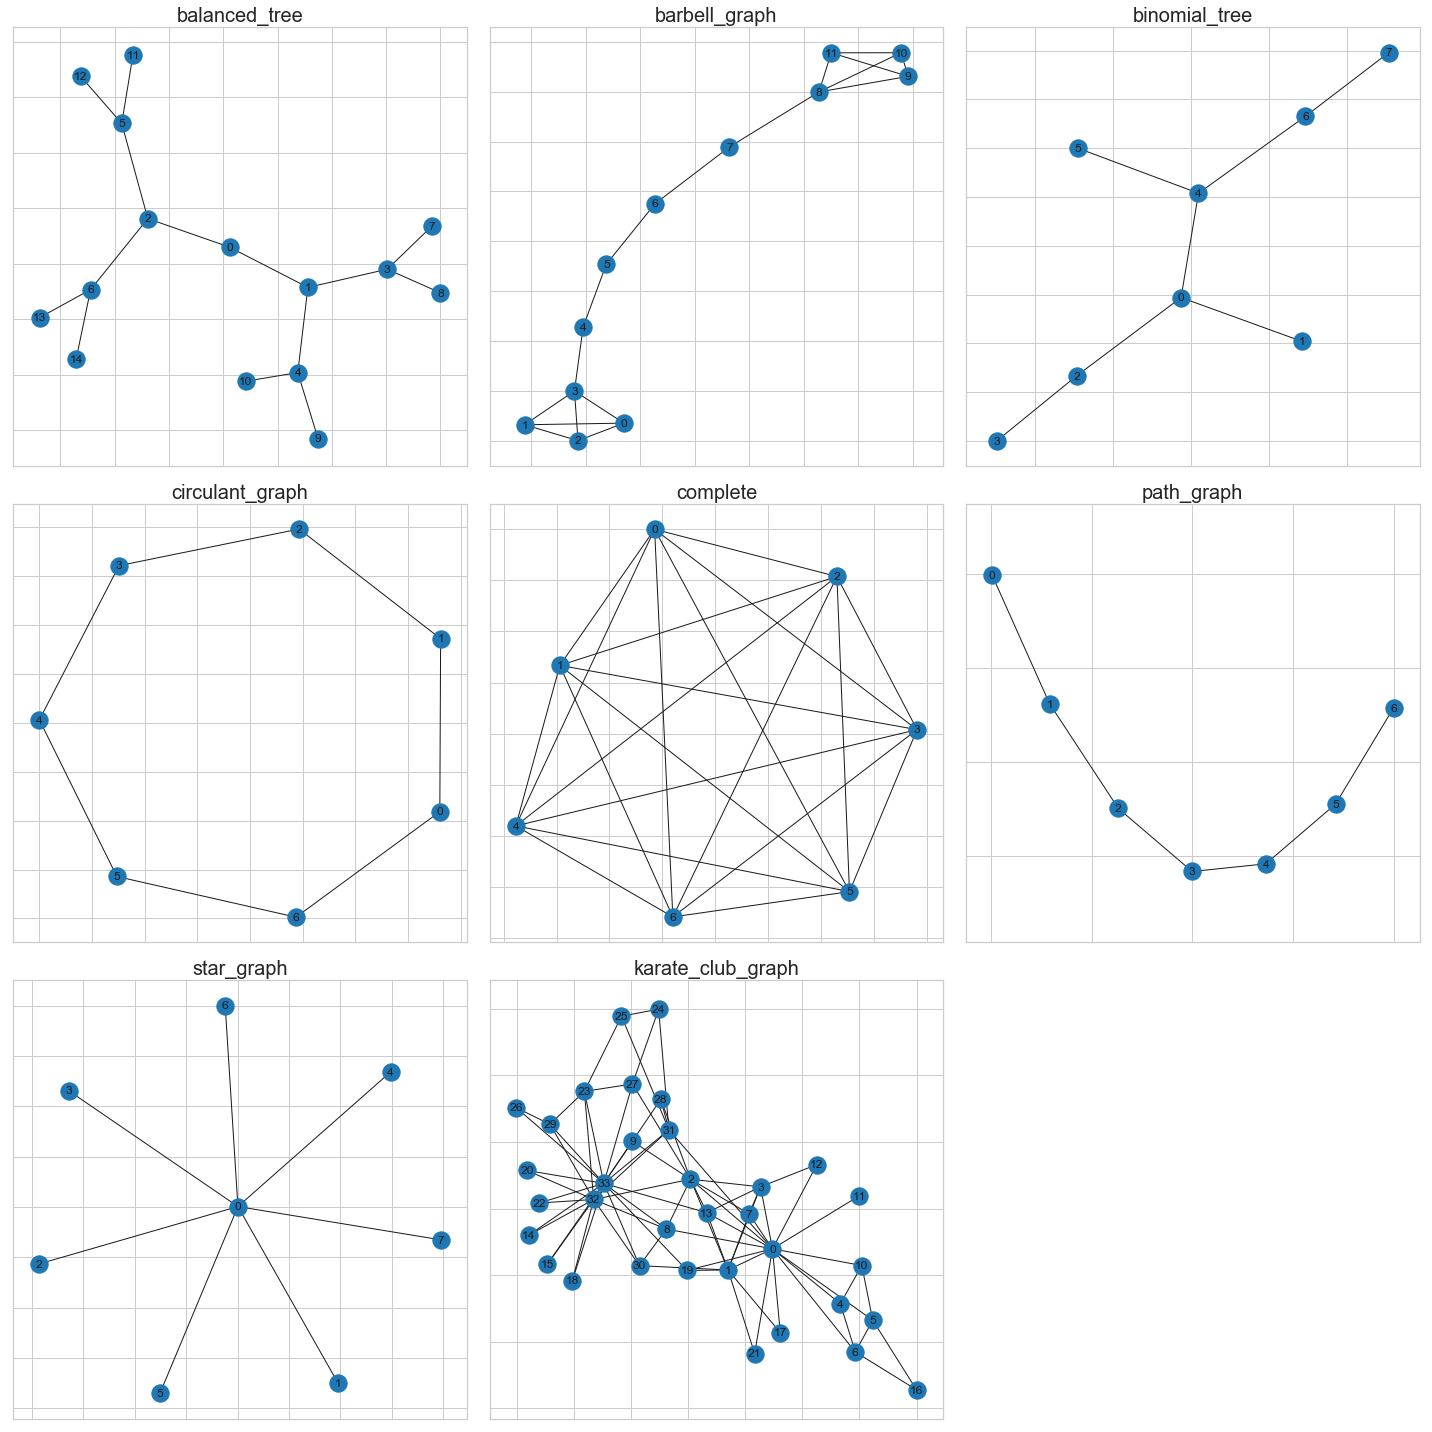

In [10]:
draw_graphs(graphs, df['Graph Type'], n_cols = 3)